In [1]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#AND radial_velocity IS NOT NULL
#Werte für Plejaden:
#CIRCLE(56.85, 24.117, 2.5))
#7.41 
#7.49 
# Werte für M 80(1)
# CIRCLE(242.26, -22, 2.5
#0.1012
#0.1025

#M44
#WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra, gaiadr3.gaia_source.dec), CIRCLE(130.1, 19.6, 2)) = 1 \
    #AND parallax > 5.36 \
    #AND parallax < 5.49 \

#NGC 3603
#WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra, gaiadr3.gaia_source.dec), CIRCLE(168.78, -61.25, 0.1)) = 1 \
    #AND parallax > 0.156 \
    #AND parallax < 0.170 \

#NGC 188
# WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra, gaiadr3.gaia_source.dec), CIRCLE(11.87, 85.25, 0.25)) = 1 \
    #AND parallax > 0.633 \
    #AND parallax < 0.677  \

#M 4
# WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra, gaiadr3.gaia_source.dec), CIRCLE(245.90, -26.52, 0.7)) = 1 \
    #AND parallax > 0.435  \
    #AND parallax < 0.472  \

# MNGC 6397
    #WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra, gaiadr3.gaia_source.dec), CIRCLE(265.18, -53.67, 0.6)) = 1 \
    #AND parallax > 0.400 \
    #AND parallax < 0.435  \

#Omega Centauri
    #WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra, gaiadr3.gaia_source.dec), CIRCLE(201.70, -47.47, 0.6)) = 1 \
    #AND parallax > 0.199 \
    #AND parallax < 0.218  \

In [ ]:
#Anfrage im Bereich
Anfrage_database3 = Gaia.launch_job_async(
    "SELECT * \
    FROM gaiadr3.gaia_source \
    WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra, gaiadr3.gaia_source.dec), CIRCLE(265.18, -53.67, 0.6)) = 1 \
    AND parallax > 0.400 \
    AND parallax < 0.435  \
    AND parallax IS NOT NULL \
    AND phot_g_mean_mag IS NOT NULL",
    dump_to_file=False
) 
results = Anfrage_database3.get_results()


INFO: Query finished. [astroquery.utils.tap.core]


In [4]:
# Extrahieren der erforderlichen Daten
#ra = results['ra'][0] # Rektaszension (in Grad)
#dec = results['dec'][0] # Deklination (in Grad)
#pmra = results['pmra'][0] # Eigenbewegung in Rektaszension (in mas/Jahr)
#pmdec = results['pmdec'][0] # Eigenbewegung in Deklination (in mas/Jahr)
#ref_epoch = results['ref_epoch'][0] # Referenzepoch (in Jahren)
#parallax in millibogensekunden
#radial_velocity in km/s
Filter = ["SOURCE_ID", "ra", "dec", "pmra", "pmdec", "ref_epoch", "parallax", "phot_g_mean_mag" , "radial_velocity"]
Gefiltert = results[Filter]

In [5]:
def get_position_on_year(year, start_epoch, start_ra, start_dec, v_ra, v_dec):
    # target_year, ref_epoch, ra, dec, pmra, pmdec

    # Berechnen der Zeitdifferenzen zur Referenzepoch
    time_diff1 = (year - start_epoch)

    # Berechnung der Positionen zu den gewünschten Zeitpunkten
    ra_epoch1 = start_ra + v_ra * time_diff1 / 1000.0 / 3600.0
    dec_epoch1 = start_dec + v_dec * time_diff1 / 1000.0 / 3600.0

    return ra_epoch1, dec_epoch1 #  neue Koordinaten nach einem Jahr in Grad


In [6]:
import math

Liste = []
Koordinaten = []
Koordinaten2024 = []

#Umrechnen in Karthesisches Koordinatensystem
def get_pos_xyz(ra, dec, parallax):
    phi = dec*math.pi/180
    labda = ra*math.pi/180
    x = math.sin(labda) * math.sin(math.pi/2 - phi) * parallax
    y = math.cos(labda) * math.sin(math.pi/2 - phi) * parallax 
    z = math.sin(phi) * parallax 
    return x, y, z


for i in Gefiltert:
    if str(i['parallax']) != "--" and i['parallax'] != None:
        Liste.append((i["SOURCE_ID"], i['parallax'], i['ra'], i['dec']))

        ra, dec = get_position_on_year(-500000, i['ref_epoch'], i['ra'], i['dec'], i['pmra'], i['pmdec'])
        x4, y4, z4 = get_pos_xyz(ra, dec, i['parallax'])
        x, y, z = get_pos_xyz(i['ra'], i['dec'], i['parallax'])

        Koordinaten2024.append((x4, y4, z4))
        Koordinaten.append((x, y, z))
        print(round(x, 5), round(y, 5), round(z, 5))

-0.24622 -0.02261 -0.33021
-0.2538 -0.02337 -0.34022
-0.2395 -0.02208 -0.32089
-0.24621 -0.02273 -0.32983
-0.24575 -0.02277 -0.32927
-0.24698 -0.02262 -0.33066
-0.24247 -0.02217 -0.32457
-0.24684 -0.02169 -0.33087
-0.24148 -0.02126 -0.32369
-0.25188 -0.02216 -0.33764
-0.2467 -0.02175 -0.33059
-0.25341 -0.02234 -0.33944
-0.2501 -0.0219 -0.33502
-0.24797 -0.02176 -0.33217
-0.25517 -0.02238 -0.34163
-0.25762 -0.0227 -0.34492
-0.2405 -0.02124 -0.3219
-0.25679 -0.02263 -0.3437
-0.24922 -0.02212 -0.33364
-0.25665 -0.02284 -0.34375
-0.2461 -0.02193 -0.32945
-0.24133 -0.02136 -0.32299
-0.24395 -0.02174 -0.32639
-0.24386 -0.02177 -0.32611
-0.25394 -0.02228 -0.33969
-0.25171 -0.02215 -0.33678
-0.25895 -0.0228 -0.34639
-0.25088 -0.02198 -0.33544
-0.24622 -0.02152 -0.32929
-0.25378 -0.02225 -0.33925
-0.24401 -0.02137 -0.32616
-0.25019 -0.02204 -0.33439
-0.24218 -0.0213 -0.32375
-0.25454 -0.02236 -0.34012
-0.25047 -0.0222 -0.33484
-0.24389 -0.02162 -0.32596
-0.24381 -0.02185 -0.32618
-0.24063 -0.02

In [7]:
file = open("Ergebnisse.txt", "w")

def get_speed_xyz(x2, y2, z2, vr, x1, y1, z1, ra, dec):
    
    dec = dec*math.pi/180 # in Bogenmaß
    ra = ra*math.pi/180
    
    xneu = (x2 - x1) / 1  + vr *  math.sin(dec) * math.sin(math.pi/2 - ra) / 149597871 * 31536000# das / 1 ist umrechnung in entfernung pro jahr
    yneu = (y2 - y1) / 1 + vr *  math.cos(dec) * math.sin(math.pi/2 - ra) / 149597871 * 31536000
    zneu = (z2- z1) / 1 + vr *  math.sin(dec) / 149597871 * 31536000
    return xneu, yneu, zneu


    
#Ermitteln einer mittleren Radialgeschwindigkeit
t = ""
vr = 0
n = 0
for stern in range (len(Gefiltert)):
    if  type(Gefiltert["radial_velocity"][stern]) == np.float32:
        vr = vr + Gefiltert["radial_velocity"][stern]
        n = n +1
vrmittel = vr / n


#Entfernungsmodu
for stern in range(len(Gefiltert)): 
    Ls = 1
    Ms = 4.83
    d = 1000/(abs(Gefiltert["parallax"][stern])) #in pc
    Mg = float(Gefiltert["phot_g_mean_mag"][stern]) - 5 * math.log10(d/10)
    L = Ls * (10**(0.4*(Ms - Mg)))
    m = L**(1/3)# je nach Literatur auch 2/7
    
#Übermitteln der Daten in txt Datei 
    x, y, z = get_pos_xyz(Gefiltert["ra"][stern], Gefiltert["dec"][stern], d*206265) # in AE
    pmra, pmdec = get_position_on_year(2016, 2015, Gefiltert["ra"][stern], Gefiltert["dec"][stern], Gefiltert["pmra"][stern], Gefiltert["pmdec"][stern])
    x2, y2, z2 = get_pos_xyz  (pmra, pmdec, d*206265)
    if  type(Gefiltert["radial_velocity"][stern]) != np.float32:
        vx, vy, vz = get_speed_xyz (x2, y2, z2,  vrmittel, x, y, z, Gefiltert["ra"][stern], Gefiltert["dec"][stern])
    else: 
        vx, vy, vz = get_speed_xyz (x2, y2, z2,  Gefiltert["radial_velocity"][stern], x, y, z, Gefiltert["ra"][stern], Gefiltert["dec"][stern]) # neue Koordinaten nach einem Jahr (gut für Einheiteihesystem) Weg in pc/Jahr
    t += str(Gefiltert["SOURCE_ID"][stern]) + ", " + str(x)  + ", " + str(y) + ", " + str(z) + ", " + str(vx)  + ", " + str(vy) + ", " + str(vz)+ ", " + str(m)
    t = t[:-2] + "\n"
file.write(t)
file.close()

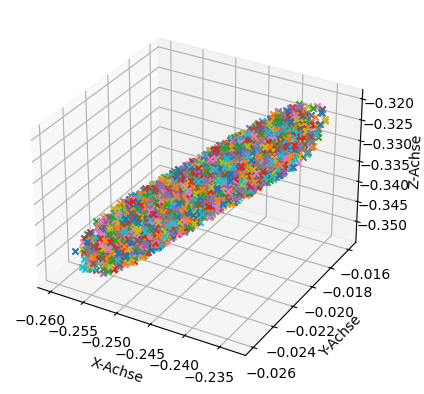

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

for i in Koordinaten:
    ax.scatter(i[0], i[1], i[2], marker="x")

ax.set_xlabel('X-Achse')
ax.set_ylabel('Y-Achse')
ax.set_zlabel('Z-Achse')

plt.show()

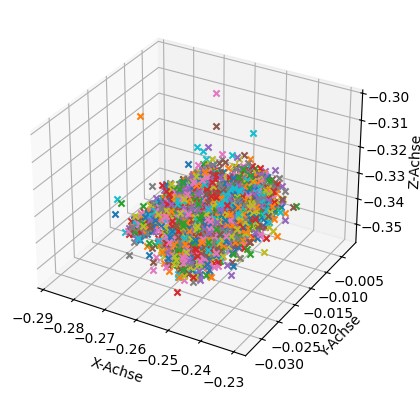

In [9]:
fig = plt.figure()

ax4 = fig.add_subplot(projection='3d')

n = 100

for i in Koordinaten2024:
    ax4.scatter(i[0], i[1], i[2], marker="x")

ax4.set_xlabel('X-Achse')
ax4.set_ylabel('Y-Achse')
ax4.set_zlabel('Z-Achse')

plt.show()